<a href="https://colab.research.google.com/github/brayanb1701/Match_Counting/blob/main/Match_Counting_Testing_Both.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries and clone the repo.

In [1]:
#@title
#### Dependencies ####
####
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
import os
import warnings

In [2]:
#@title
!git clone https://github.com/brayanb1701/Match_Counting.git
os.chdir('Match_Counting')

Cloning into 'Match_Counting'...
remote: Enumerating objects: 2414, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2414 (delta 0), reused 3 (delta 0), pack-reused 2410
Receiving objects: 100% (2414/2414), 309.75 MiB | 22.10 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (2502/2502), done.


In [3]:
#@title
model_loaded = tf.keras.models.load_model('Models/model_MFCC_both.hdf5')

## Define the sample rate of the audios to predict.

In [4]:
#Audio Sample Rate
sr = 44100

## Define some libraries for loading and visualizing data

In [5]:
#@title
def load_data_test(path,sr):
  x_eval = []
  y_eval = []
  audios = []
  BASE_PATH=path
  files = os.listdir(BASE_PATH)
  for f in files:
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")
      audio, _ = librosa.load(os.path.join(BASE_PATH, f),sr=sr, offset=0.2, duration=5)
    #raw_audio.append(audio)
    name = f.split(".")[0]
    y_eval.append(int(name.split("-")[1]))
    audios.append(audio)
    #X = np.fft.fft(audio)
    #ffts_mag.append(np.absolute(X[:len_fft]))
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    x_eval.append(np.mean(mfccs.T,axis=0))
  return audios,x_eval,y_eval

In [6]:
#@title
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    #print(len(X_mag))
    #print(f_bins)
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

## Load the data and visualize it

In [7]:
BASE_PATH = "caja_chiclets"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)

In [8]:
ipd.Audio(os.path.join(BASE_PATH, os.listdir(BASE_PATH)[0])) 

Text(0.5, 1.0, 'Signal')

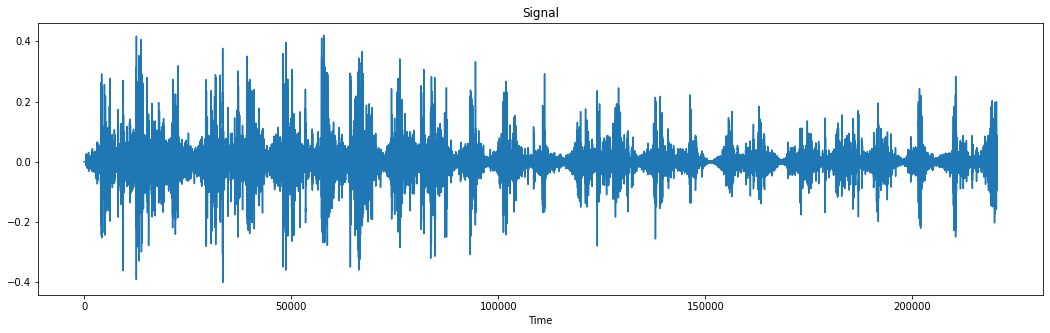

In [9]:
plt.figure(figsize=(18, 5))
plt.plot(audios[0])
plt.xlabel('Time')
plt.title("Signal")

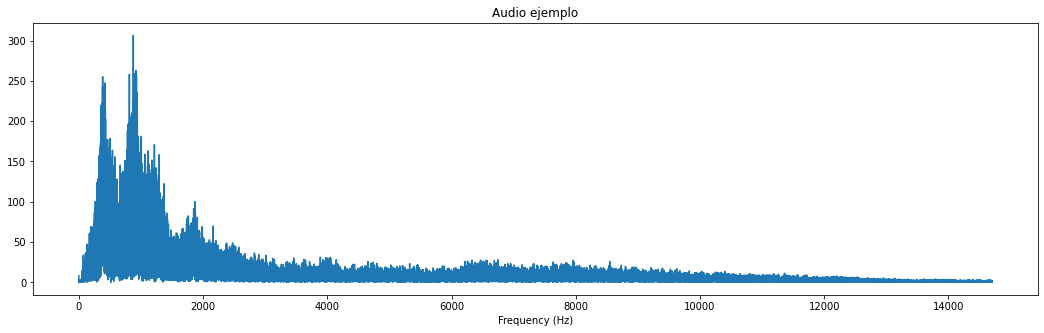

In [10]:
plot_magnitude_spectrum(audios[0], sr, "Audio ejemplo", 1/3)

## Testing the model

In [11]:
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

2/2 [==============================] - 0s 7ms/step - loss: 5222.0220 - mae: 65.8606 - mse: 5222.0220


(5222.02197265625, 65.86063385009766, 5222.02197265625)

In [12]:
BASE_PATH = "mov_vertical"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

2/2 [==============================] - 0s 9ms/step - loss: 3397.7295 - mae: 50.3351 - mse: 3397.7295


(3397.7294921875, 50.335140228271484, 3397.7294921875)

In [13]:
BASE_PATH = "mov_largo"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

2/2 [==============================] - 0s 12ms/step - loss: 935.8094 - mae: 22.4101 - mse: 935.8094


(935.8094482421875, 22.410146713256836, 935.8094482421875)

In [14]:
BASE_PATH = "caja_peq"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

2/2 [==============================] - 0s 9ms/step - loss: 5316.6060 - mae: 66.8717 - mse: 5316.6060


(5316.60595703125, 66.8717269897461, 5316.60595703125)

In [15]:
BASE_PATH = "caja_creada"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

2/2 [==============================] - 0s 10ms/step - loss: 4858.3428 - mae: 63.5431 - mse: 4858.3428


(4858.3427734375, 63.543148040771484, 4858.3427734375)

In [16]:
BASE_PATH = "caja_refuegos"
audios, x_eval, y_eval = load_data_test(BASE_PATH,sr)
x_eval = np.array(x_eval)
y_eval = np.array (y_eval)
loss, mae, mse = model_loaded.evaluate(x_eval, y_eval)
loss, mae, mse

33/33 [==============================] - 0s 2ms/step - loss: 86.5151 - mae: 6.1931 - mse: 86.5151


(86.51509857177734, 6.193143844604492, 86.51509857177734)